# Introduction

I have made this simple notebook as an assignment to be accepted in `AI Training from shAI Club`. It's about exploring and finding some insights for a dataset that provides information about the employees of an organization.

![image](https://media.licdn.com/dms/image/C4E0BAQE-SogzKeS0nQ/company-logo_200_200/0/1652345900246/shaiclub_logo?e=1714003200&v=beta&t=sYxU1kfyqXBzDD95MOP9UJpYZ7fmVvvZEAGqwXD8xa8)

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Task 1: Basic Data Exploration

In [2]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 148654
Number of columns: 13


In [3]:
print("The data types for each column:\n")
df.dtypes

The data types for each column:



Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [4]:
print("The number of missing valus in each clumn:\n")
df.isnull().sum()

The number of missing valus in each clumn:



Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## Task 2: Descriptive Statistics

In [5]:
print("Basic statistics:\n")
df.describe()

Basic statistics:



,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [6]:
print('Range of salaries:\n')
print('Maxiumum:', df['TotalPay'].max())
print('Minimum:', df['TotalPay'].min())
print('Difference:', df['TotalPay'].max() - df['TotalPay'].min())
print(30*'-')
print('Standard Deviation', df['TotalPay'].std().round(3))

Range of salaries:

Maxiumum: 567595.43
Minimum: -618.13
Difference: 568213.56
------------------------------
Standard Deviation 50517.005


In [7]:
# Task 2: Descriptive Statistics
basic_stats = df.describe()
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
std_deviation = df['TotalPay'].std()

## Task 3: Data Cleaning

I found that the number of the missing values in both `Notes` and `Status` columns equals the number of rows so that the whole column is empty so I will remove them. I will impute the missing values in the other columns by the mean of the column as it's the most popular way for handling the missing values.

In [8]:
# Drop 'Notes' and 'Status' columns
df_cleaned = df.drop(['Notes', 'Status'], axis=1)

# Impute missing values with the mean for numerical columns
df_cleaned['BasePay'].fillna(df_cleaned['BasePay'].mean(), inplace=True)
df_cleaned['OvertimePay'].fillna(df_cleaned['OvertimePay'].mean(), inplace=True)
df_cleaned['OtherPay'].fillna(df_cleaned['OtherPay'].mean(), inplace=True)
df_cleaned['Benefits'].fillna(df_cleaned['Benefits'].mean(), inplace=True)

In [9]:
# Display Clead Data
df_cleaned.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


In [10]:
# Verify that missing values have been handled
df_cleaned.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## Task 4: Basic Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use('ggplot')

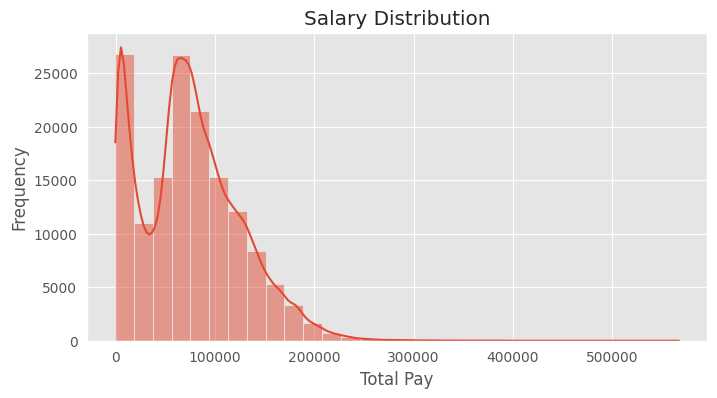

In [12]:
# Histogram for salary distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['TotalPay'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Find the number of different departments
df_cleaned['JobTitle'].nunique()

2159

The number of departments are quite high so I will represent the proportion of employees in the top 10 ones.

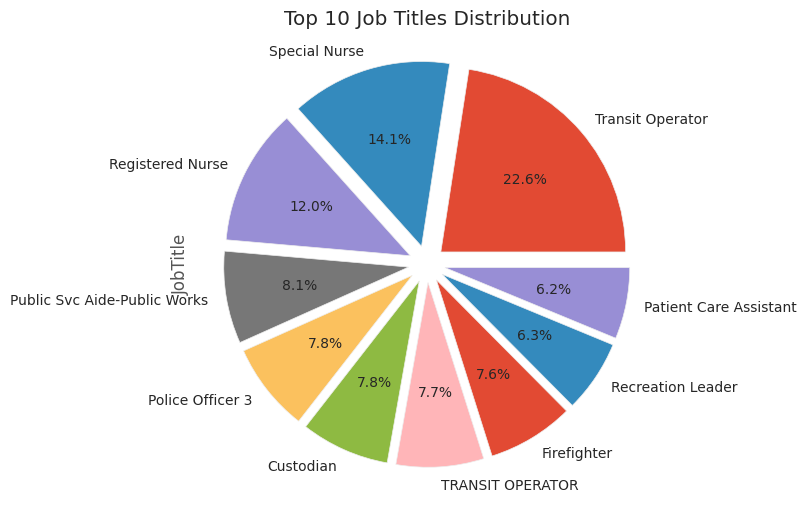

In [14]:
# Pie chart for department distribution
plt.figure(figsize=(6, 6))
df_cleaned['JobTitle'].value_counts().head(10).plot.pie(autopct='%1.1f%%', explode=([0.1]*10))
plt.title('Top 10 Job Titles Distribution')
plt.show()

## Task 5: Grouped Analysis

I will group the data by `Year` to see the frequency for each year then make summay statistice on each column according to the year.

In [15]:
# Group the data by 'Year' without calculating specific summary statistics
df_cleaned['Year'] = df_cleaned['Year'].astype('int')
grouped_data_by_year = df_cleaned.groupby('Year').size().reset_index(name='Count')
grouped_data_by_year

,Year,Count
0,2011,36159
1,2012,36766
2,2013,37606
3,2014,38123


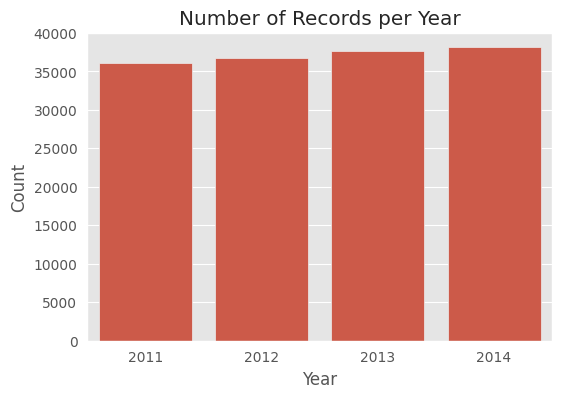

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Year', y='Count', data=grouped_data_by_year)
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [17]:
# Grouped Analysis: Group by 'Year' and calculate extended summary statistics
grouped_data_by_year_extended = df_cleaned.groupby('Year').agg({
    'BasePay': ['mean', 'median', 'std'],
    'OvertimePay': ['mean', 'median', 'std'],
    'OtherPay': ['mean', 'median', 'std'],
    'Benefits': ['mean', 'median', 'std'],
    'TotalPay': ['mean', 'median', 'std'],
    'TotalPayBenefits': ['mean', 'median', 'std']
}).reset_index()

# Display the grouped DataFrame with extended summary statistics
grouped_data_by_year_extended.round(3)

Year    BasePay                      OvertimePay                    \
              mean    median        std        mean median        std   
0  2011  63595.957  62871.72  40556.775    4531.065    0.0  10501.368   
1  2012  65436.407  64017.37  41782.210    5023.418    0.0  11431.885   
2  2013  69576.867  67132.28  43881.790    5281.642    0.0  11998.995   
3  2014  66564.397  65055.00  44051.473    5401.958    0.0  11769.039   

   OtherPay                      Benefits                         TotalPay  \
       mean   median       std       mean     median        std       mean   
0  3617.082  795.600  7959.889  25007.893  25007.893      0.000  71744.104   
1  3653.438  920.645  7936.873  26439.967  30640.190  15624.924  74113.262   
2  3819.969  792.060  8536.255  23829.077  27156.260  14749.076  77611.443   
3  3505.436  696.030  7766.707  24789.625  28425.560  15702.910  75463.918   

                        TotalPayBenefits                         
      median        std             mean      median        std  
0  68213.240  47498.707        71744.104   68213.240  47498.707  
1  70714.680  49523.904       100553.229  101751.290  63555.797  
2  74500.015  52854.775       101440.520  101969.445  66390.035  
3  72359.980  51697.713       100250.919  101105.370  66238.853

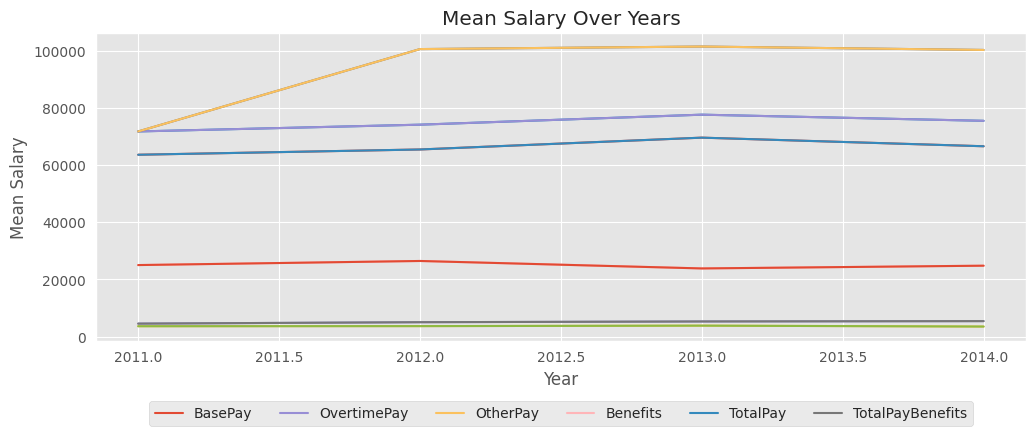

In [18]:
plt.figure(figsize=(12, 4))
metrics = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Convert 'Year' to int and assign it back
grouped_data_by_year_extended['Year'] = grouped_data_by_year_extended['Year'].astype('int')

for metric in metrics:
    sns.lineplot(x='Year', y=(f'{metric}', 'mean'), data=grouped_data_by_year_extended, label=metric)
    plt.plot(grouped_data_by_year_extended['Year'], grouped_data_by_year_extended[(f'{metric}', 'mean')])

plt.title('Mean Salary Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(metrics))
plt.show()

## Task 6: Simple Correlation Analysis

I will make a scatterplot between `BsePay` and `Totalpay` to display the correlation between them then I will make a pairplot to display the correlaction between the numerical columns.

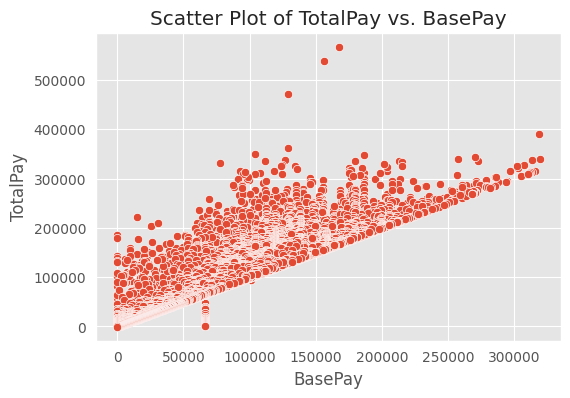


Correlation between TotalPay and BasePay: 0.951


In [19]:
# Simple Correlation Analysis
correlation_totalpay_basepay = df_cleaned['TotalPay'].corr(df_cleaned['BasePay'])

# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BasePay', y='TotalPay', data=df_cleaned)
plt.title('Scatter Plot of TotalPay vs. BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

# Display the correlation coefficient
print(f"\nCorrelation between TotalPay and BasePay: {correlation_totalpay_basepay.round(3)}")

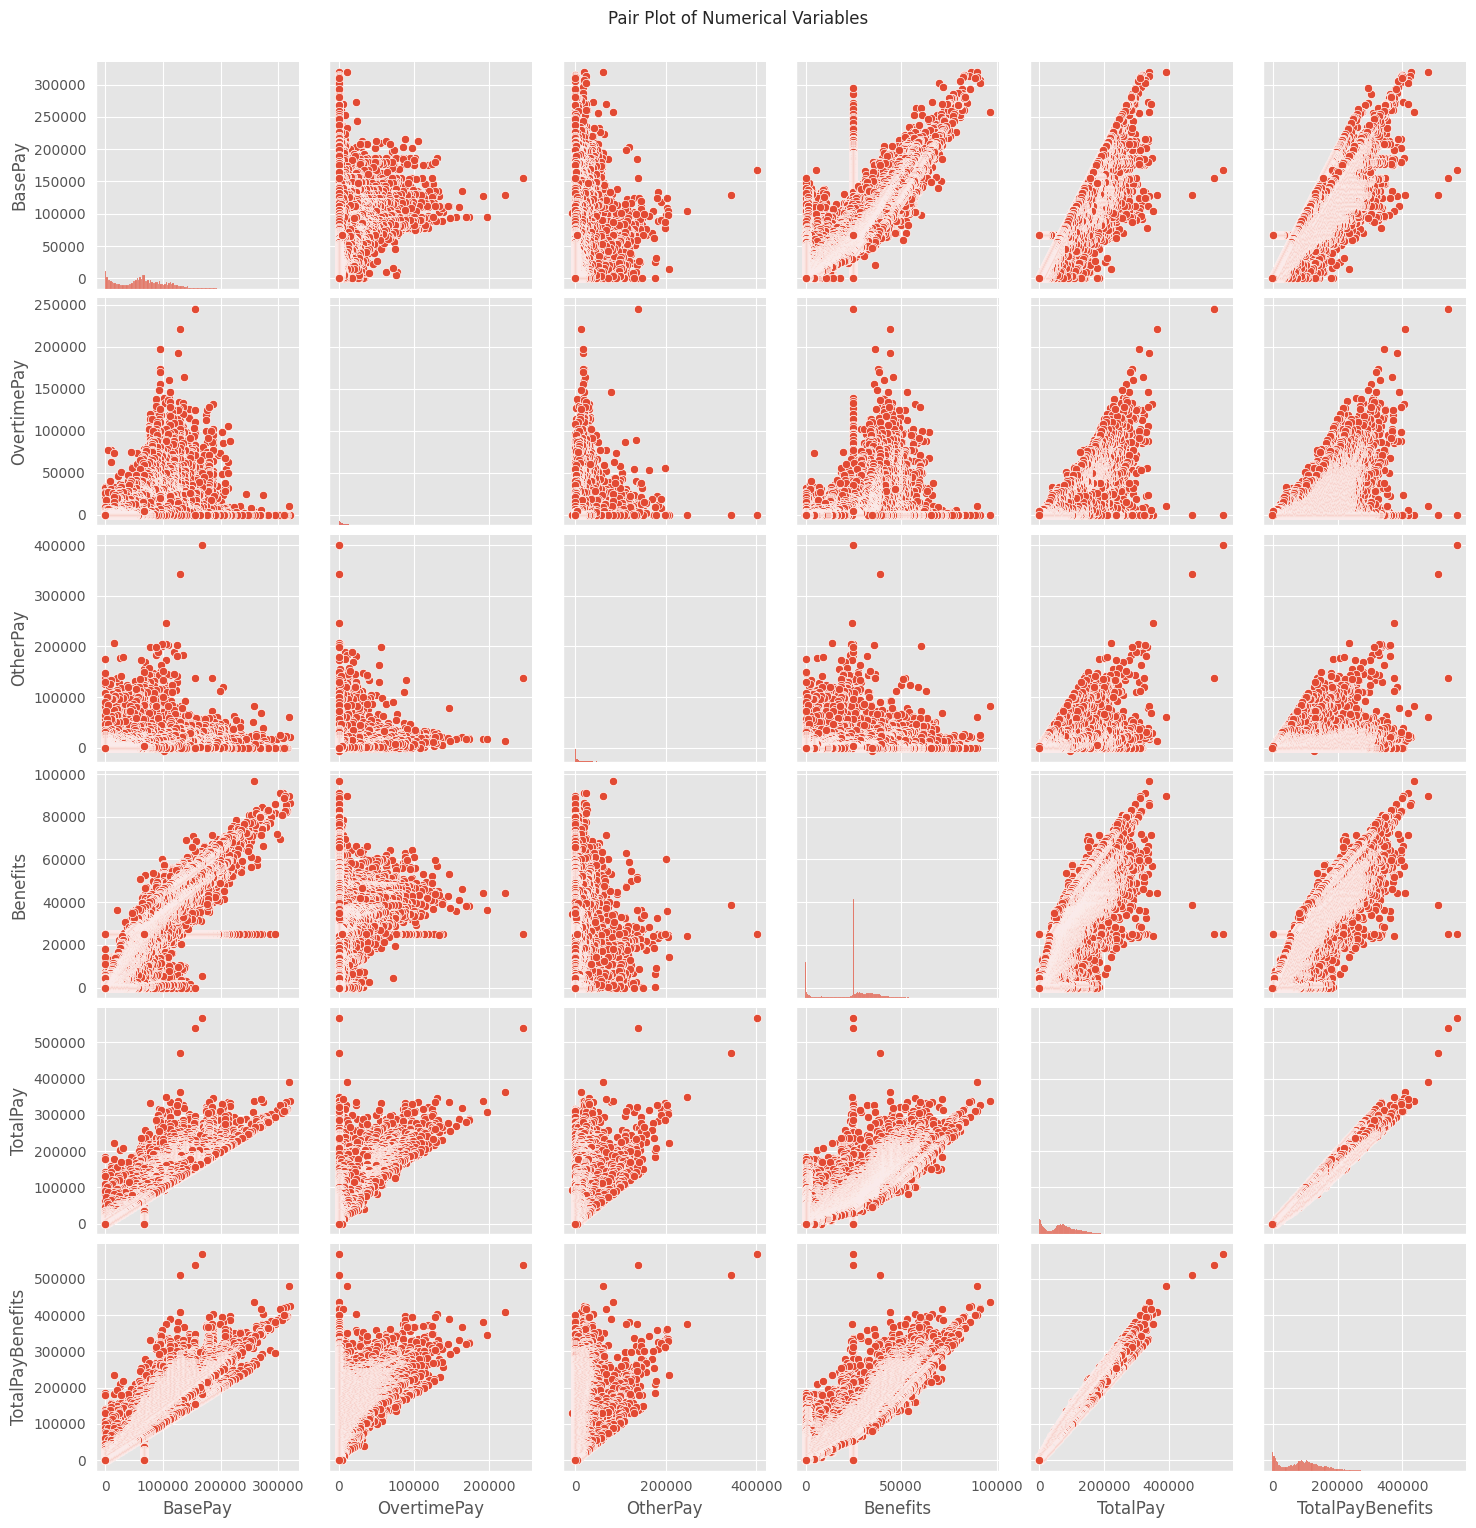

In [20]:
# Pair Plot
sns.pairplot(df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

## Task 7: Summary of Insights

## Dataset Overview

- Number of rows: 148654
- Number of columns: 13

## Range of Salaries

- Maximum: 567595.43
- Minimum: -618.13
- Standard Deviation: 50517.005

## Data Cleaning

- Removed columns 'Notes' and 'Status' as they have no non-null values.

## Imputation

- Imputed missing values in columns (BasePay, OvertimePay, OtherPay, Benefits) with the mean of each respective column.

## Data Visualizations

- Displayed the distribution of 'TotalPay' using a histogram.

- Visualized the distribution of the top 10 job titles using a pie chart.


## Grouped Analysis

- Grouped the data by 'Year' to observe the frequency for each year and conducted summary statistics on each column according to the year.

## Correlation Analysis

- Created a scatterplot between 'BasePay' and 'TotalPay' to display the correlation.
- Utilized a pairplot to display the correlation between numerical columns.


# Made by: Abdelrahman Eldaba 👨‍💻

Connect with me on [LinkedIn](https://www.linkedin.com/in/abdelrahman-eldaba-739805192/) 🌐

Look at my [GitHub](https://github.com/Abdelrahman47-code) 🚀